<h2> Predicting Bike Rentals</h2 >

<p> Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day. </p>

<p>Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, which you'll be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the <a href = 'http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset'> University of California, Irvine's website</a> .  </p> 


<p> Here are the description for the relevant columns: 
    <li> instant - A unique sequential ID number for each row </li>
    <li> dteday - The date of the rentals </li>
    <li> season - The season in which the rentals occurred </li>
    <li> yr - The year the rentals occurred</li>
    <li> mnth - The month the rentals occurred </li>
    <li> hr - The hour the rentals occurred </li>
    <li>holiday - Whether or not the day was a holiday  </li>
    <li> weekday - The day of the week (as a number, 0 to 7) </li>
    <li> workingday - Whether or not the day was a working day </li>
    <li> weathersit - The weather (as a categorical variable) </li>
    <li> temp - The temperature, on a 0-1 scale </li>
    <li> atemp - The adjusted temperature </li>
    <li> hum - The humidity, on a 0-1 scale </li>
    <li> windspeed - The wind speed, on a 0-1 scale </li>
    <li> casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)</li>
    <li> registered - The number of registered riders (people who had already signed up)</li>
    <li>cnt - The total number of bike rentals (casual + registered) </li>
  
</p>

In [4]:
import pandas as pd
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<p>Lets look at cnt column of bike_rentals and take a look at the distribuition of total rentals. </p>

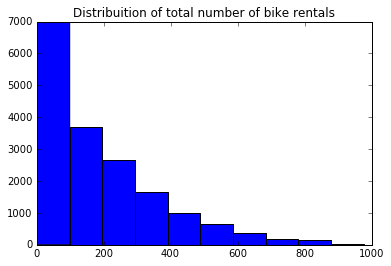

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(x = bike_rentals['cnt'])
plt.title('Distribuition of total number of bike rentals')
plt.show()

<p>Now let's create a correlation matrix on bike_rentals dataframe to explore how each column is correlated with cnt.</p>

AttributeError: 'DataFrame' object has no attribute 'sort_by_values'

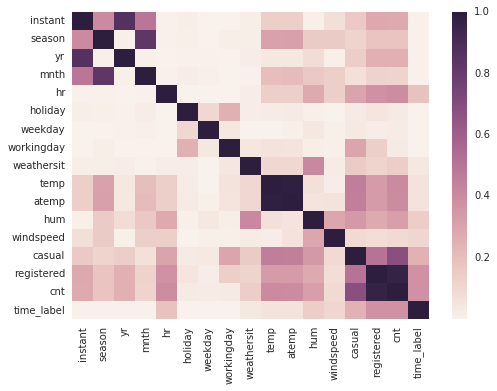

In [55]:
import seaborn as sns
corr_map = bike_rentals.corr().abs()
sns.heatmap(corr_map)

<h3> Calculating Features </h3>

<p>It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information. </p>

<p>For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions. </p>

<p> Let's create a function called assing_label that takes in a numeric value for an hour and returns an interval for a hour.
e.g - <li> 1 - If the hour is from 6 to 12; </li>
      <li> 2 - If the hour is from 12 to 18.</li>
</p>

In [43]:
def assing_label(hour):
    label = 0
    if (hour >= 6) and (hour < 12):
        label = 1
    elif (hour >= 12) and (hour < 18):
        label = 2
    elif (hour >= 18) and (hour < 24):
        label = 3
    else:
        label = 4
    return label

bike_rentals['time_label'] = bike_rentals['hr'].apply(assing_label)

0        4
1        4
2        4
3        4
4        4
5        4
6        1
7        1
8        1
9        1
10       1
11       1
12       2
13       2
14       2
15       2
16       2
17       2
18       3
19       3
20       3
21       3
22       3
23       3
24       4
25       4
26       4
27       4
28       4
29       1
        ..
17349    3
17350    3
17351    3
17352    3
17353    3
17354    3
17355    4
17356    4
17357    4
17358    4
17359    4
17360    4
17361    1
17362    1
17363    1
17364    1
17365    1
17366    1
17367    2
17368    2
17369    2
17370    2
17371    2
17372    2
17373    3
17374    3
17375    3
17376    3
17377    3
17378    3
Name: time_label, Length: 17379, dtype: int64

<h3> Split the Data into Train and Test</h3>

<p>Before we can begin applying machine learning algorithms, we need to split the data into training and testing sets. This will enable train an algorithm using the training set, and evaluate its accuracy on the testing set. If we train an algorithm on the training data, then evaluate its performance on the same data, you can get an unrealistically low error value, due to overfitting.
</p>

<p> For now let's evaluate an error metric to calculate the performace of the machine learning algorithms.</p>

<p> We're using 80% of bike_rentals set to our training model and 20% for the testing set.</p>

In [47]:
train_set = bike_rentals.sample(frac = 0.8)

In [50]:
test_set = bike_rentals.loc[~bike_rentals.index.isin(train_set.index)] #Remaing Columns 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
17,18,2011-01-01,1,0,1,17,0,6,0,2,0.44,0.4394,0.82,0.2836,15,52,67,2
22,23,2011-01-01,1,0,1,22,0,6,0,2,0.40,0.4091,0.94,0.2239,11,17,28,3
28,29,2011-01-02,1,0,1,4,0,0,0,2,0.46,0.4545,0.94,0.1940,2,1,3,4
29,30,2011-01-02,1,0,1,6,0,0,0,3,0.42,0.4242,0.77,0.2985,0,2,2,1
36,37,2011-01-02,1,0,1,13,0,0,0,2,0.36,0.3485,0.66,0.1343,11,64,75,2
40,41,2011-01-02,1,0,1,17,0,0,0,1,0.34,0.3333,0.57,0.1940,7,58,65,2
47,48,2011-01-03,1,0,1,0,0,1,1,1,0.22,0.1970,0.44,0.3582,0,5,5,4
58,59,2011-01-03,1,0,1,13,0,1,1,1,0.24,0.2121,0.35,0.2836,8,53,61,2
59,60,2011-01-03,1,0,1,14,0,1,1,1,0.26,0.2424,0.30,0.2836,11,66,77,2


<h3>Applying Linear Regression </h3>

<p> We're ready to apply linear regression to the data. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with cnt. </p>

<p> Ignore the casual and registered columns because cnt is derived from them. If you're trying to predict the number of people who rent bikes in a given hour (cnt), it doesn't make sense that you'd already know casual or registered, because those numbers are added together to get cnt.</p>

<p> First let's create a list of predictor columns to use in training and predictions. It must exclude the cnt, casual, dteday and registered columns </p>

In [59]:
predictor_columns = list(train.columns)
predictor_columns.remove('cnt')
predictor_columns.remove('casual')
predictor_columns.remove('dteday')
predictor_columns.remove('registered')

predictor_columns

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_set[predictor_columns], train_set['cnt'])
predictions = lr.predict(test_set[predictor_columns])


<p>Let's calculate the error between the predictions and the actual values. </p>

In [73]:
import numpy as np
error = (predictions - test_set['cnt']) ** 2
error_mean = np.mean(error)
error_mean

17010.81044981471

<h3> Calculate Error on Decision Tree Algorithm</h3>

In [93]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf = 5, max_depth = 5)
model.fit(train_set[predictor_columns], train_set['cnt'])
predictions_tree = model.predict(test_set[predictor_columns])

error = (predictions_tree - test_set['cnt']) ** 2
error_tree_mean = np.mean(error)
error_tree_mean

11362.193044483418

<p> We can see that using DecisionTreeRegressor our error is lower than using Linear Regression.
The diference between the two error models is almost 7k of each other.
</p>


<h3>Calculate Error on RandomForest </h3>

In [103]:
from sklearn.ensemble import RandomForestRegressor 
random_forest = RandomForestRegressor(min_samples_leaf = 10, max_depth =10)
random_forest.fit(train_set[predictor_columns], train_set['cnt'])
predictions_forest = random_florest.predict(test_set[predictor_columns])

error_forest = (predictions_forest - test_set['cnt']) ** 2
error_forest_mean = np.mean(error_forest)
error_forest_mean

10606.82947287309

In [ ]:
<p>We can see that RandomForestRegressor is the best choice to using an regressor algorithm on our bike </p>